### 1. Introduction
In this project, I investigate a dataset containing information on the GDP growth of the USA from 1961 to 2021 to identify factors influencing GDP growth and develop a predictive model. By exploring key economic indicators such as GDP, GDP per capita, and year, and leveraging linear regression, the aim is to predict future GDP growth trends and provide insights into the economic health of the USA. Additionally, I will briefly discuss total GDP values and their implications. This project serves to enhance my data science and visualization skills through hands-on experience in predictive modeling and data analysis. Suggestions for more extensive analysis and feedback on the current approach are greatly appreciated!

### 2. Import Libraries
This cell imports the necessary libraries for the project. pandas is used for data manipulation and analysis, numpy for numerical operations, and matplotlib.pyplot and seaborn for data visualization. LinearRegression from sklearn.linear_model is used to perform the linear regression analysis. Additionally, train_test_split from sklearn.model_selection is used to split the dataset into training and testing sets, while mean_squared_error, r2_score, and mean_absolute_error from sklearn.metrics are used to evaluate the model's performance.

In [ ]:
import numpy as np # for linear algebra
import pandas as pd # for data processing
from matplotlib import pyplot as plt # data plots
import seaborn as sns # pretty data plots

from sklearn.model_selection import train_test_split # for splitting data into train and test subsets
from sklearn.linear_model import LinearRegression # for using Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 3. Loading Data
This cell reads the dataset from an Excel file.

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/USA GDP Growth 1961-2021.xlsx')

### 4. Preprocessing Data
This cell performs initial preprocessing. The GDP column is cleaned by removing special characters like '$', ',', and 'B', and converting the values into billions. The GDP values are then converted to integers for easier manipulation.

In [ ]:
# Remove special characters and convert to billions
df['GDP'] = df['GDP'].str.replace('$', '').str.replace(',', '').str.replace('B', '')
df['GDP'] = df['GDP'].astype(float) * 1000000000

# Convert to integers
df['GDP'] = df['GDP'].astype(int)

### 5. Ordering the Data
 Finally, the dataset is sorted by the 'Year' column to maintain chronological order. This ensures that the data is ready for further analysis and modeling.

In [ ]:
df = df.sort_values('Year')

### 6. Basic Statistics and Visualization
This cell displays basic statistical descriptions of the dataset to understand its characteristics better. It uses Seaborn's pairplot to visualize relationships between key variables such as 'Year', 'GDP per Capita', 'GDP', and 'Growth'. These visualizations help in identifying patterns and correlations in the data, providing a foundation for building the regression model.

              Year           GDP  GDP per Capita     Growth
count    61.000000  6.100000e+01       61.000000  61.000000
mean   1991.000000  8.048613e+12    27792.721311   0.029711
std      17.752934  6.708571e+12    20040.383219   0.022006
min    1961.000000  5.633000e+11     3067.000000  -0.034000
25%    1976.000000  1.873410e+12     8592.000000   0.020100
50%    1991.000000  6.158130e+12    24342.000000   0.031000
75%    2006.000000  1.381559e+13    46302.000000   0.044500
max    2021.000000  2.299610e+13    69288.000000   0.072400


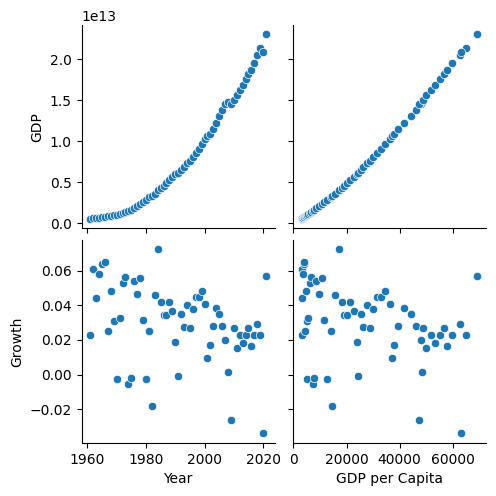

In [ ]:
# Display basic statistics
print(df.describe())

# Pairplot to visualize relationships
sns.pairplot(df, x_vars=['Year', 'GDP per Capita'], y_vars=['GDP', 'Growth'])
plt.show()



### 7. Correlation Heatmap
This cell generates a heatmap to visualize the correlations between different variables in the dataset. By annotating the heatmap, it is easier to identify the strength and direction of relationships among variables like 'Year', 'GDP', 'GDP per Capita', and 'Growth'. This step helps in understanding which variables are most strongly associated with GDP growth.

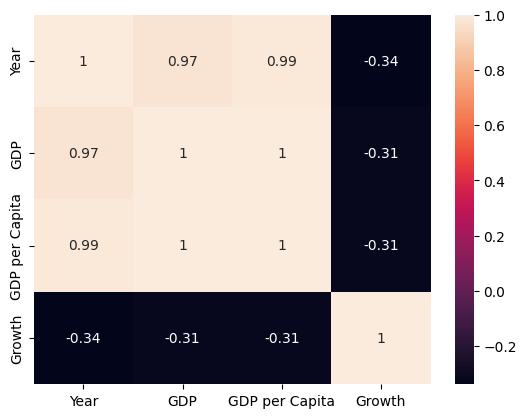

In [ ]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()


### 8. Feature Selection and Data Splitting
In this cell, the key features (independent variables) 'Year', 'GDP', and 'GDP per Capita' are selected for the model, with 'Growth' being the target variable. The dataset is then split into training and testing sets using an 80-20 split. This ensures that the model is trained on one portion of the data and tested on another, enabling a robust evaluation of its performance.

In [ ]:
# Assuming 'growth' is your target variable
X = df[['Year', 'GDP', 'GDP per Capita']]
y = df['Growth']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 9. Verify Data Split
This cell prints the shapes of the training and testing datasets to verify the data split. It shows the number of rows and columns in X_train, X_test, y_train, and y_test, ensuring the data has been correctly partitioned for training and testing.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 3)
(13, 3)
(48,)
(13,)


### 10. Sort and Verify Year Column

This cell sorts X_test by the 'Year' column and prints the sorted years from the entire dataset to ensure the chronological order is maintained.

In [ ]:
X_test = X_test.sort_values('Year')
print(sorted(X['Year']))

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]



### 11. Train the Linear Regression Model
This cell trains the Linear Regression model using the training data. The model learns the relationship between the selected features and the target variable 'Growth'. The coefficients of the model are printed to understand the impact of each feature on GDP growth. This step establishes the foundation of the predictive model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
print("Coefficients:", model.coef_)

Coefficients: [-4.50022483e-03 -1.63155286e-14  9.10336130e-06]



### 12. Model Evaluation
In this cell, predictions are made on the test set using the trained model. Performance metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) are calculated to assess the model's accuracy. These metrics provide a quantitative evaluation of how well the model predicts GDP growth.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 0.0006938594079845576
Root Mean Squared Error: 0.026341211209520293
Mean Absolute Error: 0.0217778985305978
R-squared: -0.10956430656195715


### 13. Calculate and Print Accuracy

This cell calculates and prints the accuracy of the model using the R-squared value. The accuracy is computed as (1 - abs(R^2)) and converted to a percentage. This provides an intuitive measure of how well the model predicts the target variable.

In [ ]:
print("Accuracy :",(1 - abs(r2_score(y_test, y_pred)))*100)

Accuracy : 97.73812966031076



### 14. Scatter Plot with Regression Line
This cell generates a scatter plot to visualize the relationship between 'Year' and 'Growth', comparing actual and predicted values. It uses a line plot for actual values and a scatter plot for predicted values, making it easier to see how well the model's predictions align with the actual data. This visual assessment complements the quantitative metrics calculated earlier.

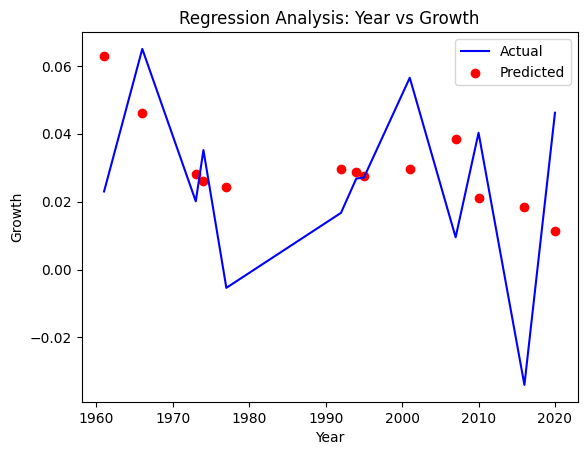

In [ ]:
# Scatter plot with regression line for 'year' vs 'growth'
plt.plot(X_test['Year'],y_test, color='blue', label='Actual')
plt.scatter(X_test['Year'],y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.title('Regression Analysis: Year vs Growth')
plt.legend()
plt.show()



### 15. Line Plot of Predictions
In this cell, a line plot is created to compare the actual and predicted values of GDP growth over time. This plot provides a clear visual representation of the model's performance, showing how closely the predictions match the actual data. It reinforces the findings from the scatter plot and helps identify any patterns or discrepancies.

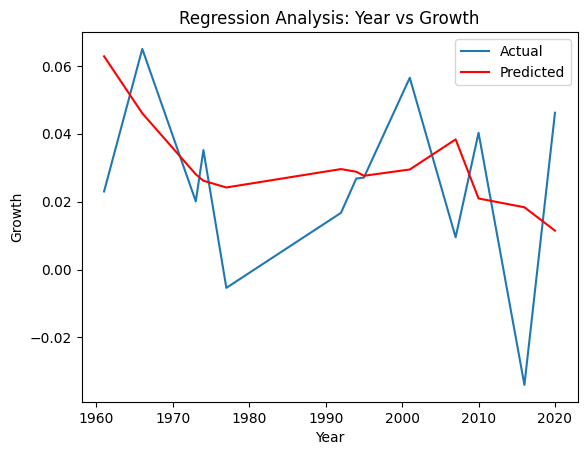

In [ ]:
# Assuming 'y_pred' contains predictions from your chosen model
plt.plot(X_test['Year'], y_test, label='Actual')
plt.plot(X_test['Year'], y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.title('Regression Analysis: Year vs Growth')
plt.legend()
plt.show()


### 16. Pairplot of relations of Growth
This cell generates a pairplot to further visualize the relationships between 'Year', 'GDP', 'GDP per Capita', and 'Growth'.

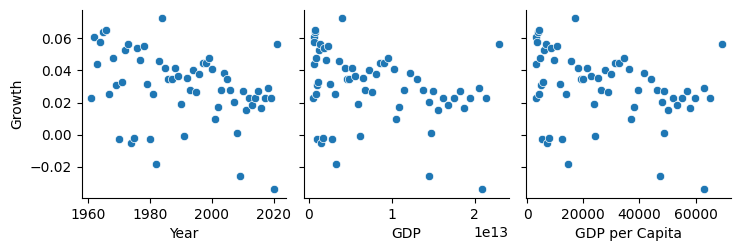

In [ ]:
sns.pairplot(df, x_vars=['Year', 'GDP', 'GDP per Capita'], y_vars=['Growth'])
plt.show()

### 17. Line plot of growth over time
It creates a line plot to show GDP growth over time. These visualizations provide deeper insights into the data and highlight trends in GDP growth across the years.

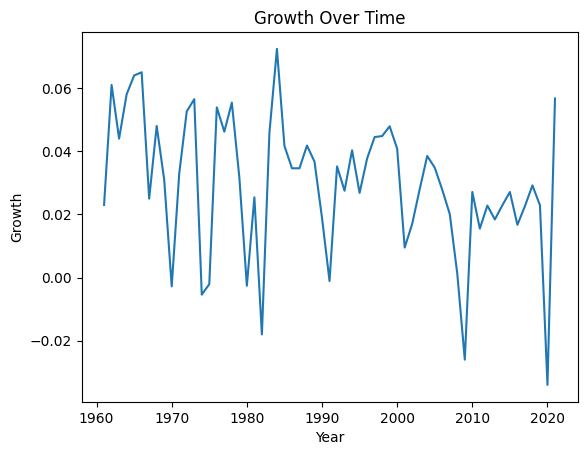

In [ ]:
plt.plot(df['Year'], df['Growth'])
plt.xlabel('Year')
plt.ylabel('Growth')
plt.title('Growth Over Time')
plt.show()

# For Future predictions for Growth


### 18. Train and Predict Future Growth
This cell focuses on predicting future GDP growth. The Linear Regression model is retrained using 'Year' as the independent variable. The model then makes predictions on the test set and plots these predictions against actual values. This step helps in forecasting future growth trends based on historical data.

In [ ]:
X_new = X_train[['Year']]  # Assuming df_train is your training DataFrame

In [ ]:
model = LinearRegression()
model.fit(X_new, y_train)  # Assuming y_train is your target variable

LinearRegression()

In [ ]:
X_test_new = X_test[['Year']]   # Assuming df_test is your testing DataFrame

In [ ]:
y_pred = model.predict(X_test_new)

In [ ]:
y_train_gdp = X_train['GDP']

# For Future predictions for GDP

### 19. Train and Predict Future GDP
This cell trains a separate Linear Regression model to predict future GDP values using 'Year' as the feature. It generates predictions for the test set and plots these predictions, providing insights into future GDP trends. This complements the GDP growth predictions and offers a comprehensive view of future economic conditions.

In [ ]:
model_gdp = LinearRegression()
model_gdp.fit(X_new, y_train_gdp)  # Assuming y_train is your target variable

LinearRegression()

In [ ]:
y_pred_gdp = model_gdp.predict(X_test_new)

### 20. Visualizing Predictions for Growth and GDP
This cell creates subplots to visualize future predictions for both GDP growth and GDP values. It plots the predicted values against the future years, providing a visual representation of expected trends. These plots help in understanding the model's long-term predictions and their potential implications.

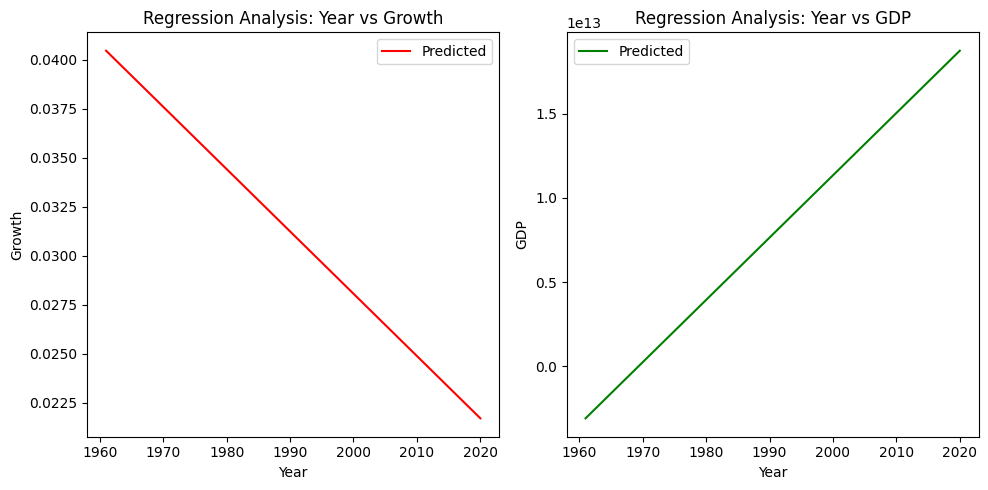

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first plot
axs[0].plot(X_test_new,y_pred, color='red', label='Predicted')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Growth')
axs[0].set_title('Regression Analysis: Year vs Growth')
axs[0].legend()

# Plot the second plot
axs[1].plot(X_test_new,y_pred_gdp, color='green', label='Predicted')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP')
axs[1].set_title('Regression Analysis: Year vs GDP')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

### 21. Future Predictions for 2022-2030
In this cell, the trained models are used to make predictions for GDP growth and GDP values for the years 2022 to 2030. The predictions are plotted to show expected future trends. This step provides forward-looking insights, helping in strategic planning and decision-making based on predicted economic conditions.

In [ ]:
future_years = pd.DataFrame({'Year': range(df['Year'].max() + 1, 2031)})

In [ ]:
future_predictions = model.predict(future_years)
future_predictions_gdp = model_gdp.predict(future_years)

### Cell 15: Visualizing Future Predictions
This cell creates subplots to visualize the future predictions for GDP growth and GDP values from 2022 to 2030. The plots display the forecasted trends, offering a clear view of the expected economic trajectory. These visualizations aid in communicating the model's predictions effectively.

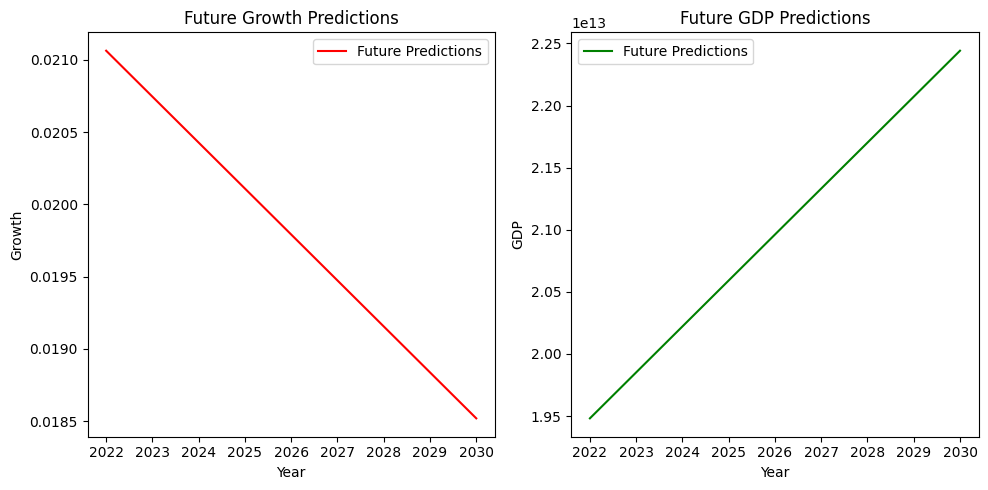

In [ ]:

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first plot
axs[0].plot(future_years['Year'], future_predictions, color='red', label='Future Predictions')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Growth')
axs[0].set_title('Future Growth Predictions')
axs[0].legend()

# Plot the second plot
axs[1].plot(future_years['Year'], future_predictions_gdp, color='green', label='Future Predictions')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP')
axs[1].set_title('Future GDP Predictions')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()